<a href="https://colab.research.google.com/github/swetha-guggal/cvip_datascience_projects/blob/main/EDA_TERRORISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

In [31]:
# importing necessary libraies
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



In [32]:

#uploading data
terror_data = pd.read_csv("/content/globalterrorism.csv", encoding='ISO-8859-1')


In [33]:
terror_data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [34]:
terror_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

To retrieve the column names of a DataFrame in Python using pandas, we can use the .columns attribute

In [35]:
terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [36]:
terror_data=terror_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
# Checking the null velues in data
terror_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

we have a DataFrame with missing values in various columns.

In [ ]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

info gives us  a summary of information about the "terror_data" DataFrame, including:

The total number of rows (entries) in the DataFrame.
The total number of columns.
The names of each column.
The count of non-null (non-missing) values in each column.
The data type of each column (e.g., integer, float, object).
The memory usage of the DataFrame.

Destructive Feature of data¶

In [ ]:
print("Country with the most attacks:",terror_data['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror_data['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_data['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_data['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_data['Group'].value_counts().index[1])
print("Most Attack Types:",terror_data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


These statistics collectively provide a snapshot of the terrorism landscape within the dataset, including the geographic areas most affected, the time periods of heightened activity, and the tactics employed by various groups. Analyzing these statistics in-depth can help researchers and policymakers better understand and address the challenges posed by terrorism.

In [38]:
# Get summary statistics for numerical columns
print(terror_data.describe())



,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505650,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814043,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [39]:

#  Drop rows with missing values (only if missing values are relatively few)
terror_data.dropna(subset=['latitude', 'longitude', 'Killed', 'Wounded'], inplace=True)

#  Fill missing values (e.g., with 0 for numerical columns)
terror_data['latitude'].fillna(0, inplace=True)
terror_data['longitude'].fillna(0, inplace=True)
terror_data['Killed'].fillna(0, inplace=True)
terror_data['Wounded'].fillna(0, inplace=True)

#  Handling Duplicates (if applicable)
terror_data.drop_duplicates(inplace=True)
# Convert 'Year', 'Month', and 'Day' to a datetime column
terror_data['Date'] = pd.to_datetime(terror_data[['Year', 'Month', 'Day']], errors='coerce')
terror_data.to_csv('cleaned_dataset.csv', index=False)

print("Data cleaning completed.")


Data cleaning completed.


Exploratory Data Analysis (EDA) is an important step in the data analysis process.
It involves the examination and visualization of data to understand its characteristics, identify patterns, and uncover insights. Below are the steps followed and python codes for performing EDA on the terrorism dataset:

Histograms for numerical variables:

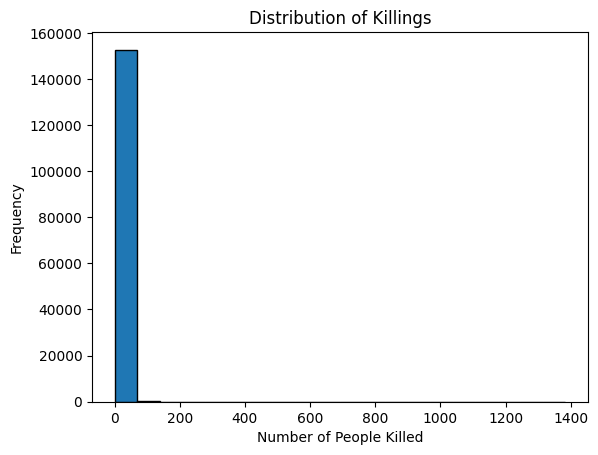

In [40]:
import matplotlib.pyplot as plt

terror_data['Killed'].plot.hist(bins=20, edgecolor='k')
plt.xlabel('Number of People Killed')
plt.title('Distribution of Killings')
plt.show()


This histogram shows the distribution of the number of people killed in terrorist incidents. The majority of incidents result in no casualties, while a smaller number of incidents have a higher number of casualties.

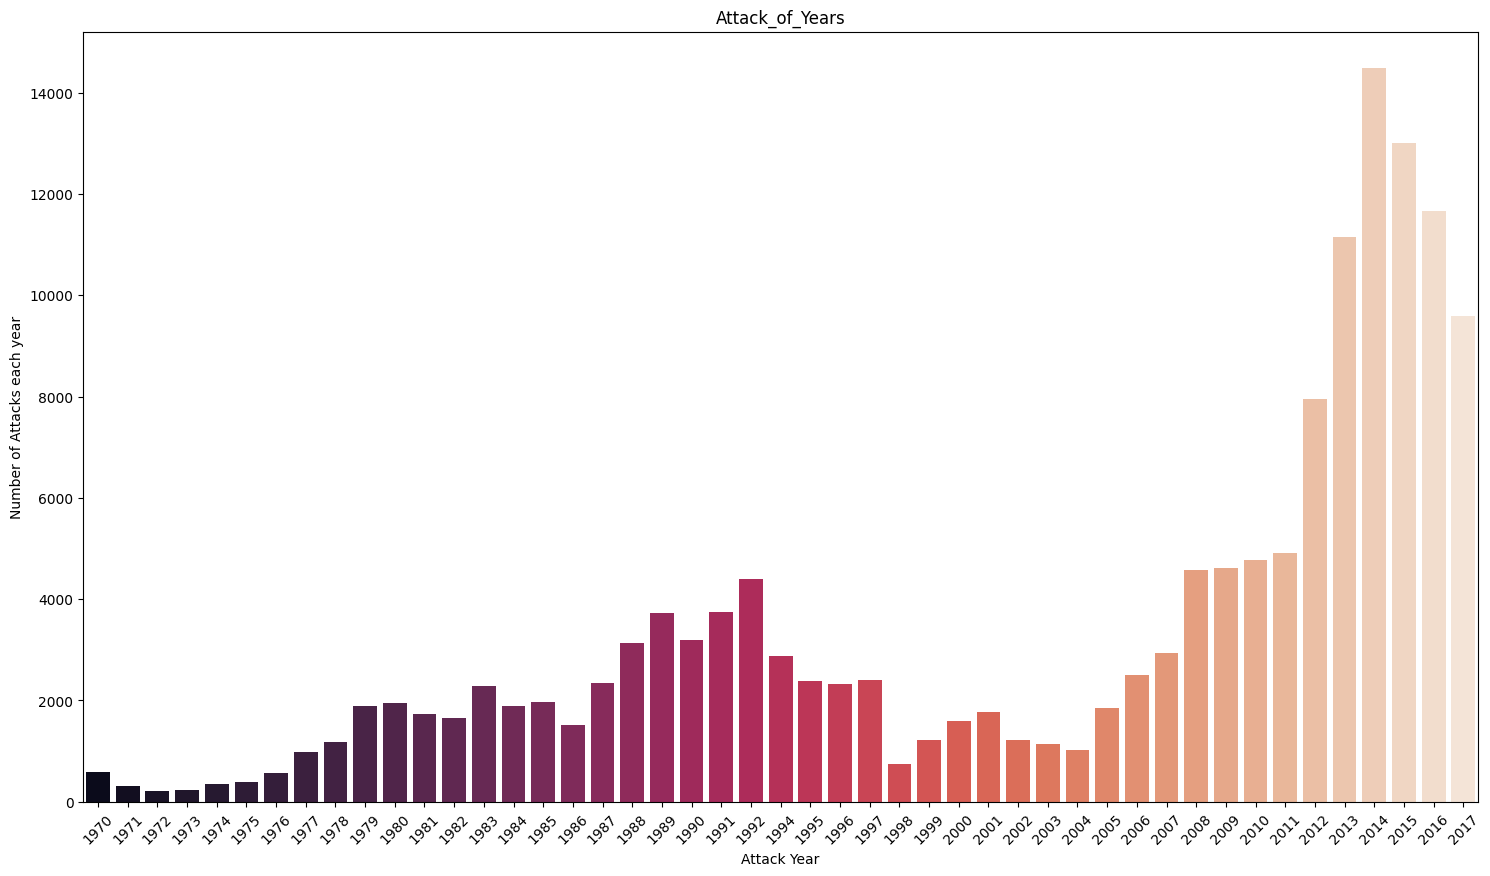

In [41]:
#bar graph
x_year = terror_data['Year'].unique()
y_count_years = terror_data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

The  plot visualizes the number of terrorist attacks for each year, allowing you to see trends and variations over time. It's a helpful way to analyze how the frequency of attacks has evolved.

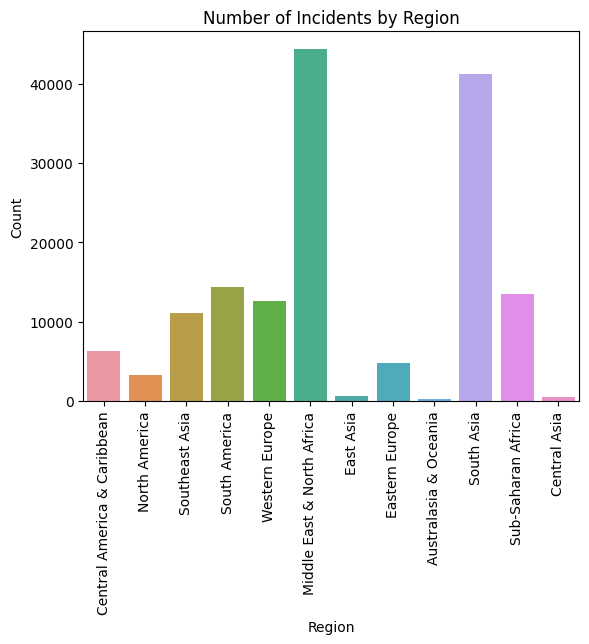

In [43]:
#Bar charts for categorical variables:
import seaborn as sns

sns.countplot(x='Region', data=terror_data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Incidents by Region')
plt.show()


This bar chart displays the number of terrorist attacks by region. The Middle East & North Africa region has the highest number of recorded incidents, followed by South Asia and Sub-Saharan Africa. Western Europe and North America have relatively fewer incidents.

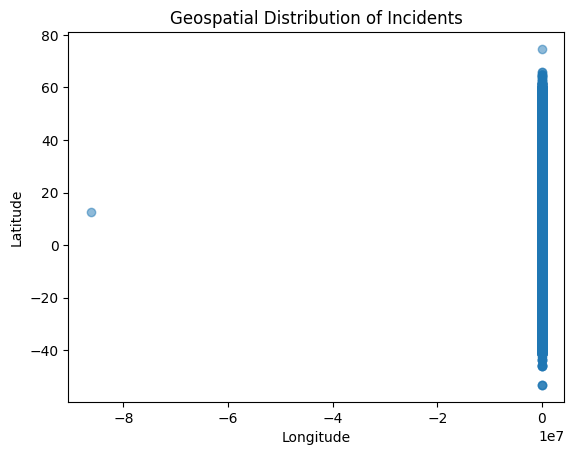

In [44]:
#Scatter plots for exploring relationships between variables:
plt.scatter(terror_data['longitude'], terror_data['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Incidents')
plt.show()


This scatter plot provides a geospatial view of the distribution of terrorist incidents based on their longitude and latitude coordinates. It shows clusters of incidents in certain geographic areas.

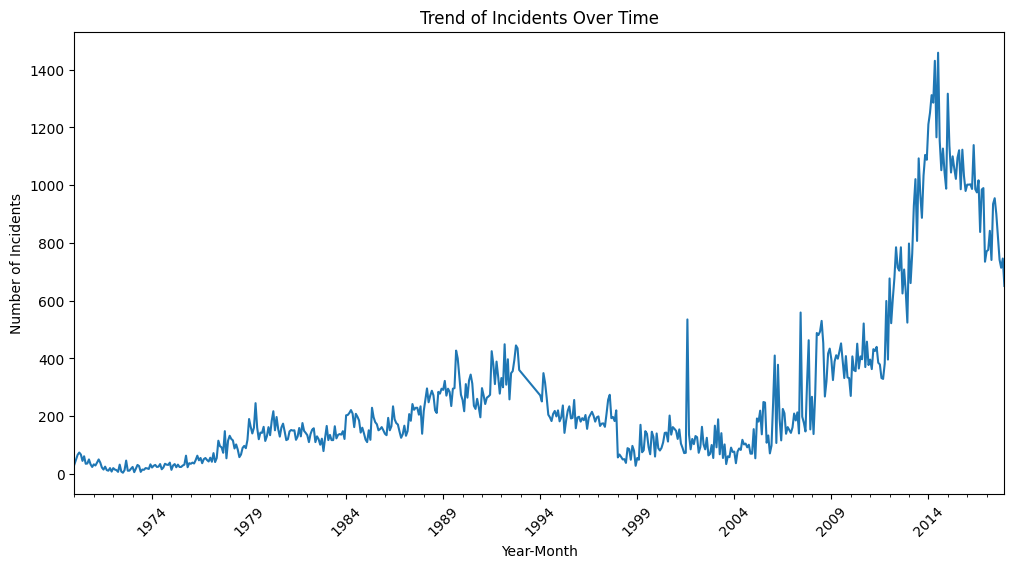

In [45]:
#Time series plots for time-related data:
terror_data['Date'] = pd.to_datetime(terror_data[['Year', 'Month', 'Day']], errors='coerce')
terror_data['YearMonth'] = terror_data['Date'].dt.to_period('M')
incidents_by_month = terror_data['YearMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
incidents_by_month.plot(kind='line')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.title('Trend of Incidents Over Time')
plt.xticks(rotation=45)
plt.show()


This time series plot illustrates the trend of terrorist incidents over time, aggregated by year-month. It shows that there has been fluctuation in the number of incidents over the years, with some periods experiencing higher activity than others.

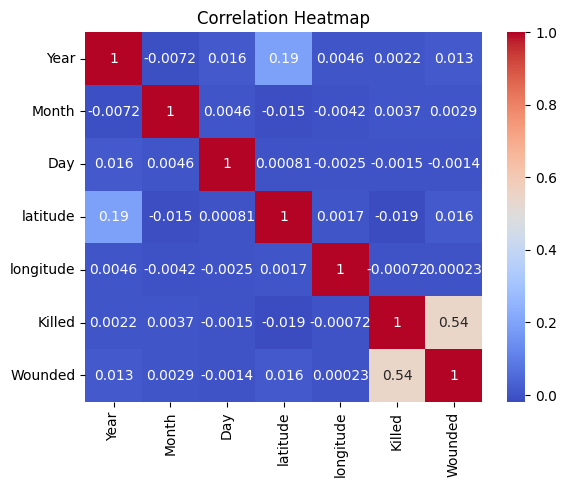

In [46]:
#Correlation Analysis:
#Calculate and visualize correlations between numerical variables to identify relationships.
correlation_matrix = terror_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap visualizes the correlation between numerical variables in the dataset. Positive correlations are indicated in warmer colors (closer to 1), while negative correlations are shown in cooler colors (closer to -1). Variables with stronger correlations may be related.



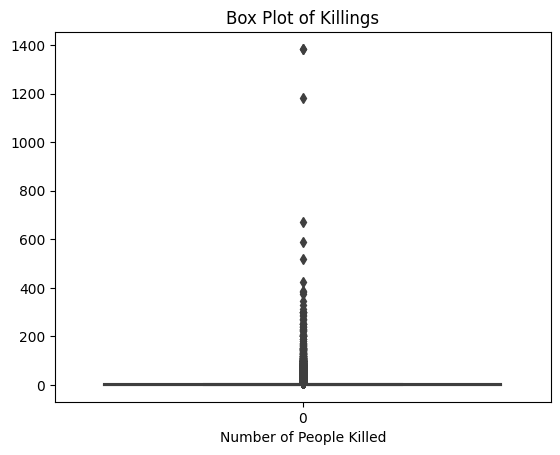

In [55]:
#Outlier Detection:
#Use statistical methods or visualizations (e.g., box plots) to identify and investigate potential outliers.
sns.boxplot(terror_data['Killed'])
plt.xlabel('Number of People Killed')
plt.title('Box Plot of Killings')
plt.show()




This box plot provides a summary of the distribution of the number of people killed in terrorist incidents. It shows the median, quartiles, and potential outliers. There are a few incidents with an unusually high number of casualties.

In [57]:
#Hypothesis Testing (if applicable):
#Conduct statistical tests to explore hypotheses or differences between groups.

from scipy.stats import ttest_ind

group1 = terror_data[terror_data['Group'] == 'Taliban']['Killed']
group2 = terror_data[terror_data['Group'] != 'Taliban']['Killed']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')


T-test statistic: 18.015287059172366
P-value: 4.1413204589716274e-71


In summary, with a t-test statistic of 18.0153 and a very small p-value, you likely have strong evidence to conclude that there is a significant difference between the two groups we tested.

In [52]:
import folium
from folium.plugins import MarkerCluster
filterYear = terror_data['Year'] == 1970

In [53]:
filterData = terror_data[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [54]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

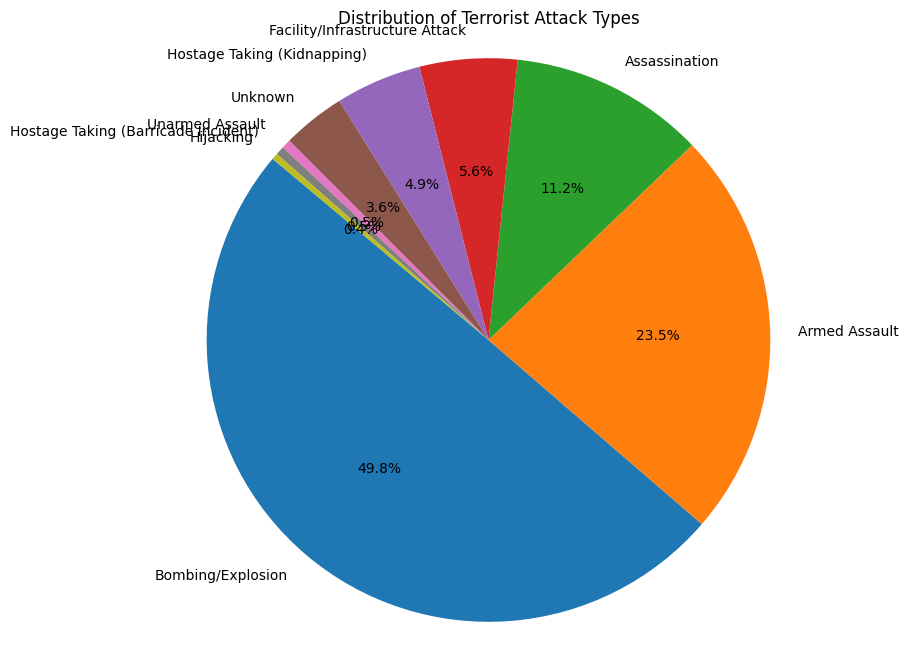

In [59]:

# Calculate the distribution of attack types
attack_type_counts = terror_data['AttackType'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_type_counts, labels=attack_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Terrorist Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


The purpose of this data analysis report is to explore and analyze the Terrorism dataset, which contains information about terrorist incidents. This report aims to provide insights into the patterns, trends, and characteristics of these incidents.

Key Findings:

Country with the Most Attacks: Iraq has the highest number of recorded terrorist attacks.
City with the Most Attacks: Baghdad is the city with the most incidents.
Region with the Most Attacks: The Middle East & North Africa region experiences the highest frequency of terrorist attacks.
Year with the Most Attacks: 2014 stands out as the year with the highest number of incidents.
Common Attack Type: The most frequent type of terrorist attack is "Bombing/Explosion."
